In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pytt.utils import read_pickle
from utils import precision_recall_f1
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np
from torch import tensor # TODO: take out when bug fixed

In [2]:
models = ['tfidf', 'cosine', 'codes', 'description', 'linearization']
base_path = "/Users/jeredmcinerney/Desktop/summary_stats/%s.csv"
# models = ['501', '1000', '1500', '2000', '2500']
# base_path = "/Users/jeredmcinerney/Desktop/stats_progression/summary_stats%s.csv"
dfs = {model:pd.read_csv(base_path % model) for model in models}

In [3]:
dfs[models[0]]

,Unnamed: 0,code_name,code_idx,attention_entropy,traceback_attention_entropy,label,score,depth,num_report_sentences,num_report_clusters,patient_id,timepoint_id,reference_sentence_indices,reference_sentence_rankings,reference_sentence_attention
0,0,170-176,3120,3.748803e+00,3.748803e+00,1,NaN,2,1000,618,100134903,1064983,"[6, 22, 204, 241, 428, 996]","[420, 446, 350, 330, 20, 35]","[0.0, 0.0, 0.0, 0.0, 0.06965362893908893, 0.0]"
1,1,custom5,3330,2.855921e+00,2.855921e+00,1,NaN,4,1000,618,100134903,1064983,[428],[561],[0.0]
2,2,174,3124,3.222643e+00,3.222643e+00,1,NaN,3,1000,618,100134903,1064983,"[6, 22, 204, 241, 428, 996]","[421, 447, 350, 331, 12, 30]","[0.0, 0.0, 0.0, 0.0, 0.09383496443009007, 0.0]"
3,3,custom4,3329,2.849000e+00,2.849000e+00,1,NaN,2,1000,618,100134903,1064983,"[176, 177]","[408, 407]","[0.0, 0.0]"
4,4,Neoplasm,3306,NaN,NaN,1,NaN,1,1000,618,100134903,1064983,"[6, 22, 176, 177, 204, 241, 428, 996]","[420, 446, 409, 408, 348, 329, 562, 2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,0,Vascular,3309,NaN,NaN,1,NaN,1,1000,553,104388346,1577117,"[817, 866, 867, 993]","[99, 77, 76, 4]","[0.0, 0.0, 0.0, 0.0]"
6,1,430-438,3236,3.272245e+00,3.272245e+00,1,NaN,2,1000,553,104388346,1577117,"[817, 866, 867, 993]","[100, 82, 81, 14]","[0.0, 0.0, 0.0, 0.12398985269936877]"
7,0,custom5,3330,NaN,NaN,1,NaN,4,1000,460,106043972,383599,"[118, 266, 267, 307, 308, 401, 481, 554, 734, ...","[318, 404, 403, 417, 412, 439, 241, 181, 254, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,1,custom2,3321,NaN,NaN,1,NaN,1,1000,460,106043972,383599,[900],[45],[0.0]
9,2,Demyelinating/Autoimmune,3281,NaN,NaN,1,NaN,1,1000,460,106043972,383599,"[476, 491]","[177, 245]","[0.0, 0.0]"


In [4]:
def get_rankings(df):
#     return sum([(np.array(eval(row.reference_sentence_rankings))/eval(row.num_report_sentences).item()).tolist() for i,row in df.iterrows()], [])
    return sum([(np.array(eval(row.reference_sentence_rankings))/row.num_report_clusters).tolist() for i,row in df.iterrows()], [])

rankings = {model:get_rankings(df) for model,df in dfs.items()}

tfidf


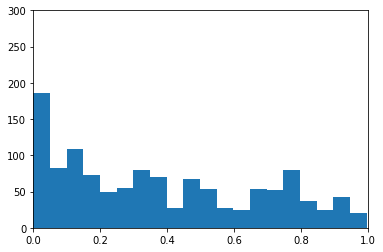

cosine


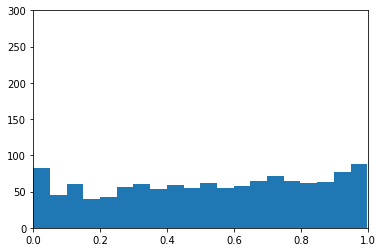

codes


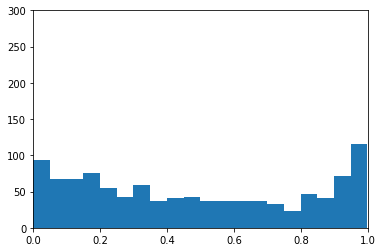

description


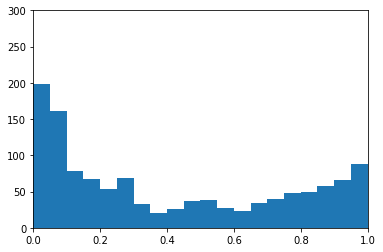

linearization


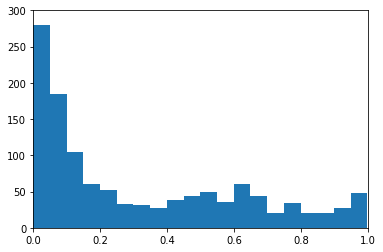

In [5]:
def plot_rankings(rankings):
    plt.hist(rankings, bins=20)
    plt.axis([0, 1, 0, 300])

for model,mrankings in rankings.items():
    print(model)
    plot_rankings(mrankings)
    plt.savefig('/Users/jeredmcinerney/Desktop/plots/rankings_distribution_%s.png' % model)
    plt.show()
    

In [6]:
def get_curve_args(df):
    sentence_rankings, sentence_labels = [], []
    for i,row in df.iterrows():
        num_report_clusters = row.num_report_clusters
        sentence_rankings_temp = list(range(num_report_clusters))
        reference_sentence_rankings = set(eval(row.reference_sentence_rankings))
        sentence_labels_temp = [(i in reference_sentence_rankings) for i in sentence_rankings_temp]
        sentence_rankings += (np.array(sentence_rankings_temp)/num_report_clusters).tolist()
        sentence_labels += sentence_labels_temp
    
    return np.array(sentence_labels, dtype=np.float), -np.array(sentence_rankings, dtype=np.float)

roc_curves = {model:roc_curve(*get_curve_args(df)) for model,df in dfs.items()}
roc_auc = {model:roc_auc_score(*get_curve_args(df)) for model,df in dfs.items()}
precision_recall_curves = {model:precision_recall_curve(*get_curve_args(df)) for model,df in dfs.items()}
average_precision = {model:average_precision_score(*get_curve_args(df)) for model,df in dfs.items()}

In [7]:
print("roc_auc:")
print(roc_auc)
print("average_precision:")
print(average_precision)

roc_auc:
{'tfidf': 0.6135147333761836, 'cosine': 0.47156720884667297, 'codes': 0.5229803931631007, 'description': 0.5899050688975602, 'linearization': 0.6865871590950311}
average_precision:
{'tfidf': 0.04020427409844793, 'cosine': 0.019163324602824102, 'codes': 0.024083857405676302, 'description': 0.0383014611252607, 'linearization': 0.05311016656196182}


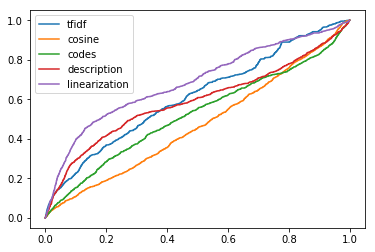

In [8]:
for model,(fpr, tpr, thresholds) in roc_curves.items():
    line, = plt.plot(fpr, tpr)
    line.set_label(model)
    plt.legend()
#     plt.show()
# plt.plot([0,1],[0,1])
plt.savefig('/Users/jeredmcinerney/Desktop/plots/roc_curve.png')

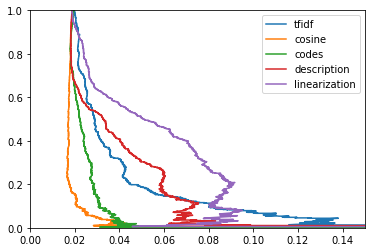

In [9]:
for model,(p, r, thresholds) in precision_recall_curves.items():
    line, = plt.plot(p, r)
    line.set_label(model)
    plt.legend()
#     plt.show()
plt.axis([0,.15,0,1])
plt.savefig('/Users/jeredmcinerney/Desktop/plots/precision_recall_curve.png')